In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

# each integrator has different properties in where the error in accuracy occurs:

# amplitude (energy) vs frequency/period (position in orbit)

# label indicies for slices in multidimensional arrays

In [2]:
# define dydt

def f(A, B, C, y):
    '''
    Params:
    -------
    A, B, C, D = coefficients to 2nd order ODE, (A w/ d2xdt2, B w/ dxdt, C w/ x)
    y = list of values, y[0] = x(t), y[1] = x'(t)
    
    Outputs:
    --------
    dydt = list of values dydt[0] = x'(t), dydt[1] = x''(t)
    '''
    dydt = np.zeros(y.shape)
    dydt[0] = y[1]
    dydt[1] = ((-B/A)*y[1] - (C/A)*y[0])
    return dydt

def Euler(y0, dydt, t0, tf, h):
    '''
    Params:
    -------
    y0 = list of values y0[0] = x(t), y0[1] = x'(t)
    dydt = calculated above f(A, B, C, y)
    t0, tf = starting and ending time, respectively
    h = time step (also resolution)
    
    Output:
    -------
    y = list of values 
    dy = first derivative of y values
    t = list of times for y and dy
    '''
    global A, B, C
    N = (tf - t0)/h
    t = np.linspace(t0, tf, N)
    n = 0 
    y = np.array([y0[0]])
    dy = np.array([y0[1]])
    for idx,time in enumerate(t[:-1]):
        yn = y0 + dydt*h
        y = np.append(y, yn[0])
        dy = np.append(dy, yn[1])
        y0 = yn
        dydt = f(A,B,C,y0) 
        continue
    return y, dy, t

def LeapFrog(y0, dydt, t0, tf, h):
    '''
    Params:
    -------
    same as above
    
    Output:
    -------
    same as above
    
    useful for conservation of energy
    '''
    N = (tf-t0)/h
    t = np.linspace(t0, tf, N)
    vi = np.array([dydt[0]])
    vh = np.array([])
    g = np.array([dydt[1]])
    x = np.array([y0[0]])
    for n,time in enumerate(t[:-1]):
        vh_n = vi[n] + g[n]*h/2
        vh = np.append(vh,vh_n)
        
        x_n = x[n] + h * vh[n]
        x = np.append(x, x_n)
        
        y_n = np.array([x_n, vh_n])
        yp_n = f(A, B, C, y_n)
        
        gn = yp_n[1]
        g = np.append(g, gn)
        
        vi_n = vh_n + g[n+1] * h/2
        vi = np.append(vi, vi_n)
        
        n += 1
        continue
    return x, vi, t

def RK4(y0, dydt0, t0, tf, h):
    '''
    Params:
    -------
    same as above
    
    Output:
    -------
    same as above
    '''
    global A, B, C
    n = 0
    N = (tf - t0)/h
    y = np.array([y0[0]])
    dy = np.array([y0[1]])
    t = np.linspace(t0,tf,N)
    for n, time in enumerate(t[:-1]):
        y0 = np.array([y[n],dy[n]])
        k1 = h * f(A, B, C, y0)
        k2 = h * f(A, B, C, y0+(k1/2))
        k3 = h * f(A, B, C, y0+(k2/2))
        k4 = h * f(A, B, C, y0+(k3))
        yn = y0 + k1/6 + k2/3 + k3/3 + k4/6
        y_n = yn[0]
        dy_n = yn[1]
        y = np.append(y,y_n)
        dy = np.append(dy,dy_n)
        n +=1 
    return y, dy, t

# Function Coefficients
A = 1
B = 0
C = 1
    
# IC's
y0 = np.array([1,0])
dydt0 = f(A,B,C,y0)
t0 = 0
tf = 30
h = np.array([1, 0.3, 0.1, 0.03, 0.01])


  

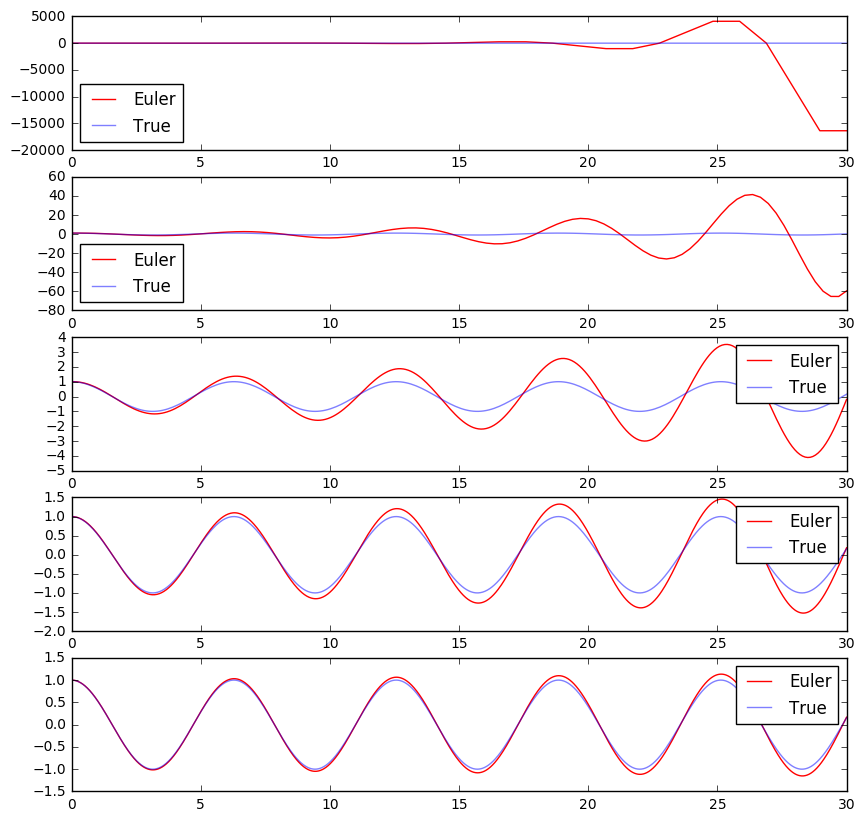

In [3]:
# Euler plot
fig,ax = plt.subplots(h.shape[0])
fig.set_size_inches(10,10)
for idx,val in enumerate(h):
    y_eu, dy_eu, t = Euler(y0, dydt0, t0, tf, val)
    tru = np.cos(t)
    ax[idx].plot(t, y_eu, label='Euler', color='red')
    ax[idx].plot(t, tru, label='True', color = 'blue', alpha = 0.5)
    ax[idx].legend(loc=0)
  

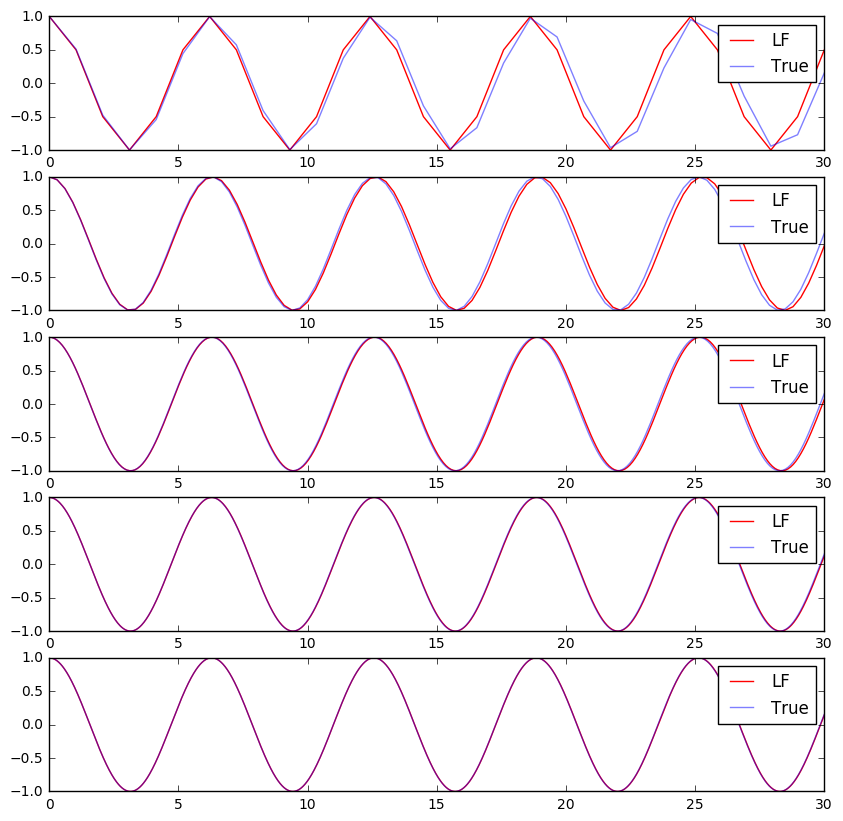

In [4]:
# LeapFrog plot
fig,ax = plt.subplots(h.shape[0])
fig.set_size_inches(10,10)
for idx,val in enumerate(h):
    y_lf, dy_lf, t = LeapFrog(y0, dydt0, t0, tf, val)
    tru = np.cos(t)
    ax[idx].plot(t, y_lf, label='LF', color='red')
    ax[idx].plot(t, tru, label='True', color = 'blue', alpha = 0.5)
    ax[idx].legend(loc=0)

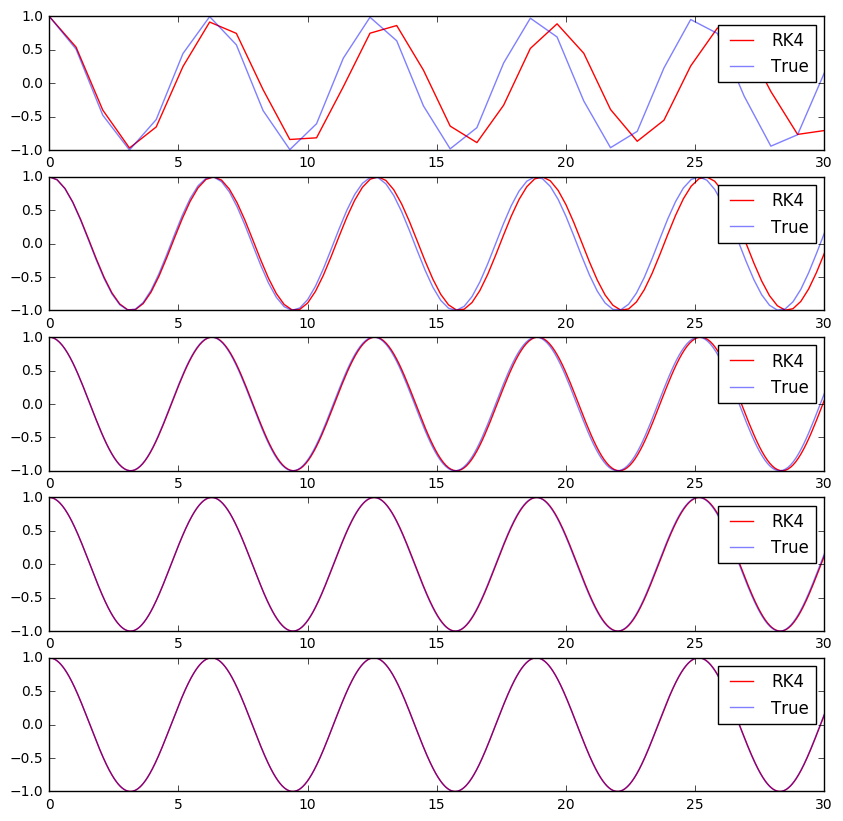

In [5]:
# RK4 plot
fig,ax = plt.subplots(h.shape[0])
fig.set_size_inches(10,10)
for idx,val in enumerate(h):
    y_rk4, dy_rk4, t = RK4(y0, dydt0, t0, tf, val)
    tru = np.cos(t)
    ax[idx].plot(t, y_rk4, label='RK4', color='red')
    ax[idx].plot(t, tru, label='True', color = 'blue', alpha = 0.5)
    ax[idx].legend(loc=0)

By looking at the above graphs with varying step size, it becomes apparent that the RK4 method and LeapFrog methods are both significantly more accurate at lower resolutions (higher h). This shows that we cant sacrifice some resolution for the RK4 and LeapFrog methods for faster/fewer computations when comparing to the Euler method. Generally, the Euler method is the least accurate, followed by the LeapFrog method, and then 4th Order Runge Kutta method, which is the most accurate at lower resolutions. 

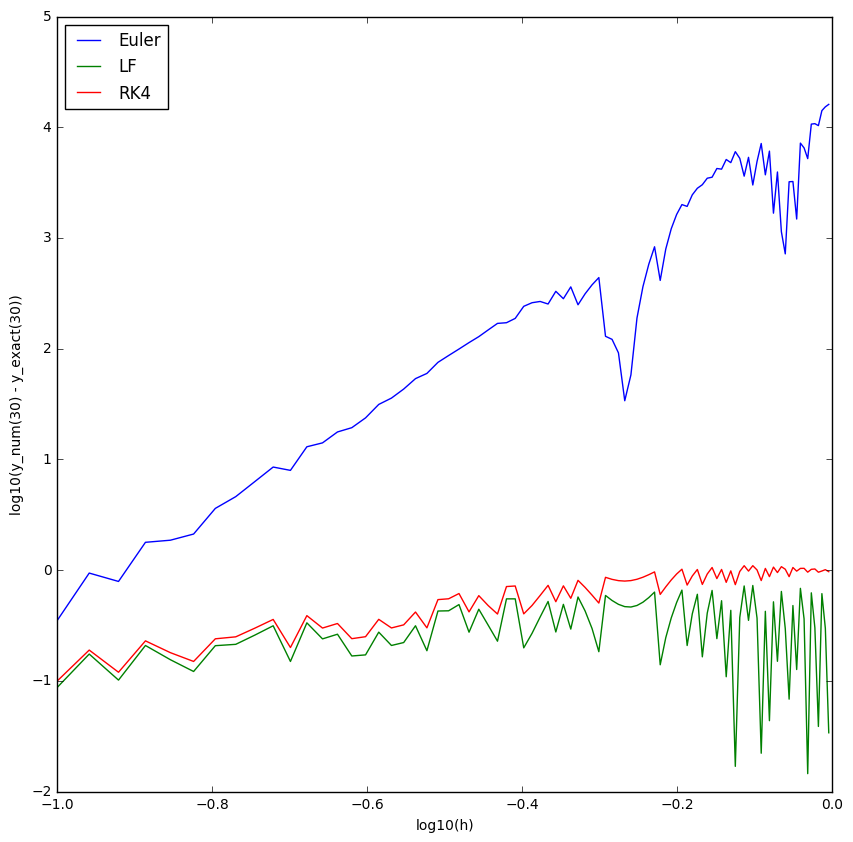

In [6]:
# plot log(x_num(30) - x_ex(30) as fcn of h)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

h = np.arange(0.1,1,0.01) # h != 0, gets error otherwise

# array to be filled below
# containing the log10(x_num - x_ex) for each method
y_euler = np.array([]) 
y_leap = np.array([])
y_runge = np.array([])

for val in h:
    y_exact = np.cos(30)
    y_eu, dy_eu, t_eu = Euler(y0, dydt0, t0, tf, val)
    y_lf, dy_lf, t_lf = LeapFrog(y0, dydt0, t0, tf, val)
    y_rk4, dy_rk4, t_rk4 = RK4(y0, dydt0, t0, tf, val)

    y_eu_30 = y_eu[-1]
    y_lf_30 = y_lf[-1]
    y_rk4_30 = y_rk4[-1]
    
    y_eu_log = np.log10(np.absolute(y_eu_30 - y_exact))
    y_lf_log = np.log10(np.absolute(y_lf_30 - y_exact))
    y_rk4_log = np.log10(np.absolute(y_rk4_30 - y_exact))

    y_euler = np.append(y_euler, y_eu_log)
    y_leap = np.append(y_leap, y_lf_log)
    y_runge = np.append(y_runge, y_rk4_log)

ax.plot(np.log10(h), y_euler, label='Euler')
ax.plot(np.log10(h), y_leap, label='LF')
ax.plot(np.log10(h), y_runge, label='RK4')
ax.legend(loc=0)
ax.set_xlabel('log10(h)')
ax.set_ylabel('log10(y_num(30) - y_exact(30))')

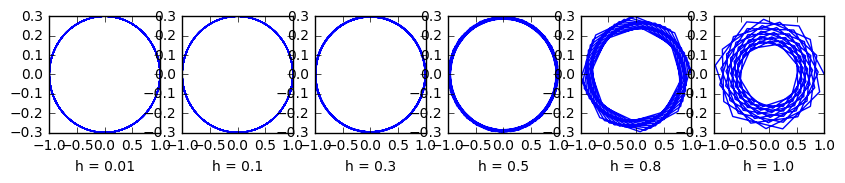

In [7]:
def potential(x,y):
    '''
    Params:
    -------
    x, y = values generated from above approxmiations (array)
    
    Output:
    -------
    phi = gravitational potential for described orbit
    '''
    phi = -(1/np.sqrt(1 + x**2 + y**2))
    return phi

def energy(dx, dy, pot):
    '''
    Params:
    -------
    dx, dy, = first derivatives, generated from the numerical methods above
    pot = gravitational potential defined above
    
    Output:
    -------
    E = energy, based on equation given in homework
    '''
    E = (dx**2 + dy**2)/2 + pot
    return E

# IC's
y0 = np.array([0,0.3])
dydt0 = f(A,B,C,y0)
x0 = np.array([1,0])
dxdt0 = f(A,B,C,x0)
t0 = 0
tf = 100

# array of step size to display precession
h = np.array([0.01, 0.1, 0.3, 0.5, 0.8, 1])

fig, ax = plt.subplots(1,h.shape[0])
fig.set_size_inches(10,1.5)

for idx, val in enumerate(h):
    y_new, dy_new, t_y = RK4(y0, dydt0, t0, tf, val)
    x_new, dx_new, t_x = RK4(x0, dxdt0, t0, tf, val)
    ax[idx].plot(x_new, y_new)
    ax[idx].set_xlabel('h = '+str(val))

    



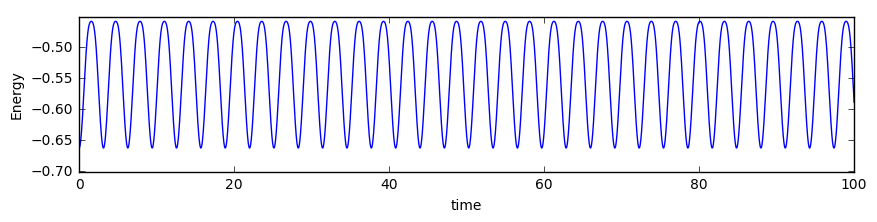

In [8]:
# graphs and calculates the energy
# step size (resolution)

h = 0.01
y_new, dy_new, t_y = RK4(y0, dydt0, t0, tf, h)
x_new, dx_new, t_x = RK4(x0, dxdt0, t0, tf, h)

pot = np.array([])
E = np.array([])
for x,y,dx,dy in zip(x_new, y_new, dx_new, dy_new):
    p = potential(x,y)
    pot = np.append(pot, p)
    
    ener = energy(dx, dy, p)
    E = np.append(E, ener)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,2)

ax.plot(t_y, E)
ax.set_xlabel('time')
ax.set_ylabel('Energy')
    
    